Imports

In [1]:
#! pip install numpy 
#! pip install qiskit
#! pip install matplotlib

In [2]:
from qiskit import QuantumCircuit, Aer ,BasicAer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

The circuit for GHZ Entanglement

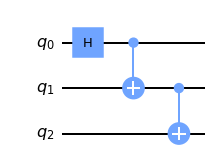

In [3]:
GHZ_circuit = QuantumCircuit(3)

GHZ_circuit.h(0)
GHZ_circuit.cx(0, 1)
GHZ_circuit.cx(1, 2)

GHZ_circuit.draw('mpl')

Measuring Bob's qubit in the Zeeman basis and comapring with the special state

In [4]:
initial = ["000", "001", "010", "011", "100", "101", "110", "111"]

initial_states = []

for label in initial:
    initial_states.append(Statevector.from_label(label))
    
#print(initial_states)

evolved_states = []

for state in initial_states:
    evolved_states.append(state.evolve(GHZ_circuit))

#print(evolved_states) 

matrix = np.zeros((2**3, 2**3), dtype = "complex_")

for i in range(2**3):
    for j in range(2**3):
        matrix[i][j] = evolved_states[i][j]
matrix  = matrix.T
        
print("Matrix form of the GHZ entangler = ")
print(matrix)

Matrix form of the GHZ entangler = 
[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j